In [1]:
#from google.colab import files
#
#uploaded = files.upload()
#
#for fn in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(
#      name=fn, length=len(uploaded[fn])))
#
#  !ls

In [2]:
import re
import numpy as np
import pandas as pd

df = pd.read_csv('BBB_features.csv', sep=';')
label = pd.read_csv('BBB_labels.txt', header=None, sep=' ')
logbb = []
classes = []
for molname in df['Objects']:
    basename = re.sub(r'_c\d+', '', molname)
    if basename in label[0].values:
        logBB = label[label[0] == basename][1].values[0]
        logbb.append(logBB)
        if logBB > 0:
            classes.append(1)
        else:
            classes.append(0)
    else:
        print('removing', molname)

df['logBB'] = logbb
df['Class'] = classes

print('logBB', len(logbb))
print('classes', len(classes))
print(df.shape)
print(df.head())

logBB 3608
classes 3608
(3608, 130)
                        Objects        V        S        R        G         d  \
0  1,1,1,2-tetrachloroethane_c0  327.875  248.402  1.31994  1.12279  0.511927   
1  1,1,1,2-tetrachloroethane_c1  327.750  249.588  1.31316  1.13127  0.512122   
2  1,1,1,2-tetrachloroethane_c2  327.625  241.829  1.35478  1.07934  0.512318   
3  1,1,1,2-tetrachloroethane_c3  326.250  243.898  1.33765  1.09783  0.514477   
4  1,1,1,2-tetrachloroethane_c4  327.625  244.183  1.34172  1.09514  0.512318   

        W1       W2     W3   W4  ...   P5    EMDIF    EMDIS  Sdry/S  Spol/S  \
0  560.000  163.875  4.875  0.0  ...  0.0  3.11199  2.80238     1.0     0.0   
1  561.875  163.500  4.750  0.0  ...  0.0  3.11199  2.80274     1.0     0.0   
2  550.625  162.375  4.375  0.0  ...  0.0  3.11199  2.80524     1.0     0.0   
3  550.750  163.375  4.500  0.0  ...  0.0  3.11199  2.80523     1.0     0.0   
4  551.375  163.000  4.500  0.0  ...  0.0  3.11199  2.80289     1.0     0.0   

  

In [3]:
X = df
print('                          Initial X.shape', X.shape)
# remove columns with NaN
X = X.dropna(axis=1)    
print('      After removing NaN columns, X.shape', X.shape)
# remove constant columns
X = X.loc[:, (X != X.iloc[0]).any()]
print(' After removing constant columns, X.shape', X.shape)
# remove duplicate columns
X = X.T.drop_duplicates().T
print('After removing duplicate columns, X.shape', X.shape)
y_regression = np.array(df['logBB'])
X.drop(['logBB'], axis=1, inplace=True)
permeate = df['Class'].tolist()
X.drop(['Class'], axis=1, inplace=True)
y_classification = np.array(permeate)
# trry also to use categorical
print()
print('X.shape', X.shape)
print('y_regression.shape', y_regression.shape)
print('y_classification.shape', y_classification.shape)

print(X.info())
# print each X column everage and std deviation
print()
print('X columns average and std deviation:')
for col in X.columns:
    if col != 'Objects':
        print(f'{col}: avg={X[col].mean():.4f}, std={X[col].std():.4f}')


                          Initial X.shape (3608, 130)
      After removing NaN columns, X.shape (3608, 127)
 After removing constant columns, X.shape (3608, 125)
After removing duplicate columns, X.shape (3608, 125)

X.shape (3608, 123)
y_regression.shape (3608,)
y_classification.shape (3608,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3608 entries, 0 to 3607
Columns: 123 entries, Objects to PAINS
dtypes: object(123)
memory usage: 3.4+ MB
None

X columns average and std deviation:
V: avg=552.4429, std=202.2248
S: avg=387.4471, std=121.9283
R: avg=1.4011, std=0.0904
G: avg=1.2978, std=0.1389
d: avg=0.4125, std=0.0847
W1: avg=908.5674, std=304.8175
W2: avg=513.3480, std=247.8358
W3: avg=266.3081, std=161.3544
W4: avg=108.4644, std=75.0177
W5: avg=50.5712, std=40.3504
W6: avg=21.2528, std=20.4407
W7: avg=6.9407, std=9.1792
W8: avg=1.4158, std=3.0600
D1: avg=202.6513, std=94.3741
D2: avg=86.4462, std=49.6445
D3: avg=33.9245, std=22.8631
D4: avg=18.3450, std=14.5966
D5: avg=11.4640, 

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_regression_train_val, \
    y_regression_test, y_classification_train_val, \
    y_classification_test = \
    train_test_split(X, y_regression, y_classification, \
                     test_size=0.2, random_state=42)
X_train, X_val, y_regression_train, \
    y_regression_val, y_classification_train, \
    y_classification_val = \
    train_test_split(X_train_val, y_regression_train_val, \
                     y_classification_train_val, \
                     test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2
print('X_train.shape', X_train.shape)
print('y_regression_train.shape', y_regression_train.shape)
print('y_classification_train.shape', y_classification_train.shape)
print('X_val.shape', X_val.shape)
print('y_regression_val.shape', y_regression_val.shape)
print('y_classification_val.shape', y_classification_val.shape)
print('X_test.shape', X_test.shape)
print('y_regression_test.shape', y_regression_test.shape)
print('y_classification_test.shape', y_classification_test.shape)

X_train.shape (2164, 123)
y_regression_train.shape (2164,)
y_classification_train.shape (2164,)
X_val.shape (722, 123)
y_regression_val.shape (722,)
y_classification_val.shape (722,)
X_test.shape (722, 123)
y_regression_test.shape (722,)
y_classification_test.shape (722,)


In [5]:
# Scale the data using StandardScaler
from sklearn.preprocessing import StandardScaler
Xscaler = StandardScaler()
X_train_scaled = Xscaler.fit_transform(X_train.drop(['Objects'], axis=1))
X_val_scaled = Xscaler.transform(X_val.drop(['Objects'], axis=1))
X_test_scaled = Xscaler.transform(X_test.drop(['Objects'], axis=1))
Yscaler = StandardScaler()
y_regression_train_scaled = Yscaler.fit_transform(y_regression_train.reshape(-1, 1)).flatten()
y_regression_val_scaled = Yscaler.transform(y_regression_val.reshape(-1, 1)).flatten()
y_regression_test_scaled = Yscaler.transform(y_regression_test.reshape(-1, 1)).flatten()

In [6]:
# drop highly correlated features using th X_train_scaled
import numpy as np
import pandas as pd

threshold = 0.95
# Create a DataFrame from the scaled data
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns.drop('Objects'))

# Calculate the correlation matrix
corr_matrix = X_train_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than the threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
X_train_df = X_train_df.drop(columns=to_drop)

# Apply the same feature selection to validation and test sets
X_val_df = pd.DataFrame(X_val_scaled, columns=X_val.columns.drop('Objects'))
X_val_df = X_val_df.drop(columns=to_drop)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns.drop('Objects'))
X_test_df = X_test_df.drop(columns=to_drop)

X_train_np = X_train_df.astype(float).to_numpy()
X_val_np = X_val_df.astype(float).to_numpy()
X_test_np = X_test_df.astype(float).to_numpy()

print('After removing highly correlated features:')
print('X_train_np.shape', X_train_np.shape)
print('  X_val_np.shape', X_val_np.shape)
print(' X_test_np.shape', X_test_np.shape)


After removing highly correlated features:
X_train_np.shape (2164, 70)
  X_val_np.shape (722, 70)
 X_test_np.shape (722, 70)


In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

for ncomp in range(2, X_train_np.shape[1]-X_train_np.shape[1]%10):
    pca = PCA(n_components=ncomp)
    X_pca = pca.fit_transform(X_train_np)
    totalexplained = sum(pca.explained_variance_ratio_)
    print('ncomp %3d'%(ncomp), 'totalexplained %3.2f'%(totalexplained))


ncomp   2 totalexplained 0.45
ncomp   3 totalexplained 0.53
ncomp   4 totalexplained 0.60
ncomp   5 totalexplained 0.65
ncomp   6 totalexplained 0.70
ncomp   7 totalexplained 0.73
ncomp   8 totalexplained 0.76
ncomp   9 totalexplained 0.78
ncomp  10 totalexplained 0.81
ncomp  11 totalexplained 0.83
ncomp  12 totalexplained 0.84
ncomp  13 totalexplained 0.86
ncomp  14 totalexplained 0.87
ncomp  15 totalexplained 0.88
ncomp  16 totalexplained 0.89
ncomp  17 totalexplained 0.90
ncomp  18 totalexplained 0.91
ncomp  19 totalexplained 0.92
ncomp  20 totalexplained 0.93
ncomp  21 totalexplained 0.94
ncomp  22 totalexplained 0.94
ncomp  23 totalexplained 0.95
ncomp  24 totalexplained 0.95
ncomp  25 totalexplained 0.96
ncomp  26 totalexplained 0.96
ncomp  27 totalexplained 0.97
ncomp  28 totalexplained 0.97
ncomp  29 totalexplained 0.97
ncomp  30 totalexplained 0.97
ncomp  31 totalexplained 0.98
ncomp  32 totalexplained 0.98
ncomp  33 totalexplained 0.98
ncomp  34 totalexplained 0.98
ncomp  35 

In [8]:
pca = PCA(n_components=36)
pca.fit(X_train_np)
X_train_np = pca.transform(X_train_np)
print('X_train_np.shape', X_train_np.shape)
X_test_np = pca.transform(X_test_np)
print('X_test_np.shape', X_test_np.shape)
X_val_np = pca.transform(X_val_np)
print('X_val_np.shape', X_val_np.shape)

X_train_np.shape (2164, 36)
X_test_np.shape (722, 36)
X_val_np.shape (722, 36)


In [10]:
import timeit
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping  # Import EarlyStopping
from sklearn.preprocessing import StandardScaler

adam = Adam(learning_rate=0.001)

start = timeit.default_timer()

model = Sequential()
model.add(InputLayer(shape=(X_train_np.shape[1],)))
# L2 Regularization. This adds a small "penalty" to the 
# model for having large weights (coefficients). It's 
# a classic method that discourages the model from 
# relying too heavily on any single feature and helps it 
# find a simpler, more general solution.
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
# *** ADDED DROPOUT ***
# This layer "drops" 20% of its neurons randomly during training,
# forcing the model to learn more robust, general patterns.
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
# *** ADDED DROPOUT ***
# This layer "drops" 20% of its neurons randomly during training,
# forcing the model to learn more robust, general patterns.
model.add(Dropout(0.2))


model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error',
              optimizer=adam,
              metrics=['mse'])

# *** DEFINE EARLY STOPPING ***
# This callback will monitor the 'val_loss'.
# If the validation loss doesn't improve for 5 epochs ('patience=5'),
# it will stop the training and restore the best weights.
early_stopper = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# --- Train the Model ---
# We increased epochs to 100, but EarlyStopping will find the best one.
history = model.fit(
    X_train_np, y_regression_train_scaled,
    epochs=200,  # Train for more epochs
    batch_size=64,
    verbose=1,
    validation_data=(X_val_np, y_regression_val_scaled),
    callbacks=[early_stopper]  # *** ADDED CALLBACK ***
)

endtrain = timeit.default_timer()
print('Time train %8.3f s' % (endtrain - start))

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.8715 - mse: 0.7302 - val_loss: 0.4109 - val_mse: 0.2708
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5300 - mse: 0.3909 - val_loss: 0.3478 - val_mse: 0.2098
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4489 - mse: 0.3118 - val_loss: 0.3236 - val_mse: 0.1874
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3965 - mse: 0.2612 - val_loss: 0.2849 - val_mse: 0.1506
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3814 - mse: 0.2481 - val_loss: 0.2791 - val_mse: 0.1468
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3422 - mse: 0.2107 - val_loss: 0.2669 - val_mse: 0.1364
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3280 - mse: 0.1983 - val_loss: 0.2556 - val_mse: 0.1267
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3142 - mse: 0.1862 - val_loss: 0.2333 - val_mse: 0.1063
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.294

min loss:  0.061548467725515366
min val_loss:  0.04849841818213463


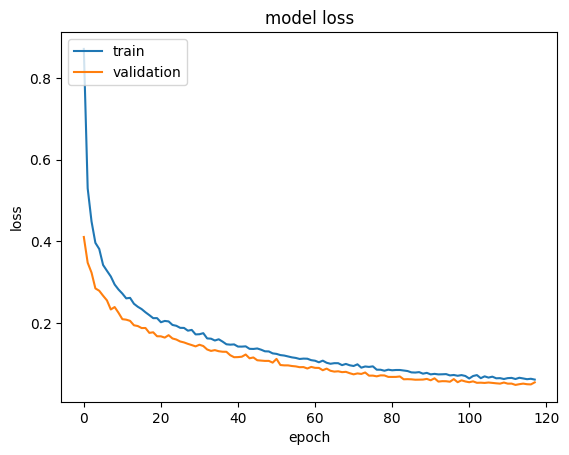

In [11]:
import matplotlib.pyplot as plt

print("min loss: ", min(history.history['loss']))
print("min val_loss: ", min(history.history['val_loss']))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test_rmse:  0.11045249328434815
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train_rmse:  0.07347708057637978
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Validation_rmse:  0.10459863984502016


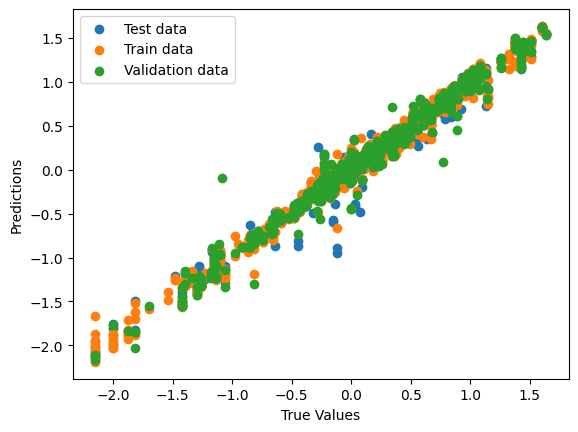

In [12]:
Y_pred_test = model.predict(X_test_np)
Y_pred_test = Yscaler.inverse_transform(Y_pred_test).flatten()
test_rmse = np.sqrt(mean_squared_error(y_regression_test, Y_pred_test))
print('Test_rmse: ', test_rmse)
Y_pred_train = model.predict(X_train_np)
Y_pred_train = Yscaler.inverse_transform(Y_pred_train).flatten()
train_rmse = np.sqrt(mean_squared_error(y_regression_train, Y_pred_train))
print('Train_rmse: ', train_rmse)
Y_pred_val = model.predict(X_val_np)
Y_pred_val = Yscaler.inverse_transform(Y_pred_val).flatten()
val_rmse = np.sqrt(mean_squared_error(y_regression_val, Y_pred_val))
print('Validation_rmse: ', val_rmse)
plt.figure()
plt.scatter(y_regression_test, Y_pred_test, label='Test data')
plt.scatter(y_regression_train, Y_pred_train, label='Train data')
plt.scatter(y_regression_val, Y_pred_val, label='Validation data')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()